In [44]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, BatchNormalization,Dropout, Conv1D, MaxPooling1D, concatenate, Activation

In [45]:
df = pd.read_csv('./train.csv')

df_scaled = df
scale_cols = df_scaled[df_scaled.columns.difference(['leaktype'])].columns

#입력 데이터에 대해 표준화 진행 후 정답 데이터 추가

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled, columns=scale_cols)

df_scaled['leaktype'] = df['leaktype'].values

#dataframe shuffle

df_scaled = df_scaled.sample(frac=1).reset_index(drop=True)

#입력 데이터와 정답 데이터 분리

feature_df = df_scaled[df_scaled.columns.difference(['leaktype'])]
label_df = df_scaled['leaktype']

#other : 0, noise : 1, normal : 2, in : 3, out : 4

label_df = label_df.replace('other', 0)
label_df = label_df.replace('noise', 1)
label_df = label_df.replace('normal', 2)
label_df = label_df.replace('in', 3)
label_df = label_df.replace('out', 4)

#from dataframe to numpy

feature_np = feature_df.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

#split train datasets and validation datasets

split = 0.2

test_num = int(split*len(label_np))

x_valid = feature_np[0:test_num]
y_valid = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

#one-hot encoding

y_valid = tf.keras.utils.to_categorical(y_valid, num_classes=5)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [46]:
# train, test dataset을 0-60, 185-250, 185-330, 370-, 240-300, 330-370, 370-450, 290-400 구간으로 나누기
# 50이하인 구간이거나 뚜렷한 특징이 없는 구간은 삭제
# 전체 데이터셋도 입력

df1_x_train = x_train[:, 0:60]
df2_x_train = x_train[:, 185:250]
df3_x_train = x_train[:, 185:330]
df4_x_train = x_train[:, 370:]
df5_x_train = x_train[:, 240:300]
df6_x_train = x_train[:, 330:370]
df7_x_train = x_train[:, 370:450]
df8_x_train = x_train[:, 290:400]
entire_x_train = x_train[:,:]

df1_x_valid = x_valid[:, 0:60]
df2_x_valid = x_valid[:, 185:250]
df3_x_valid = x_valid[:, 185:330]
df4_x_valid = x_valid[:, 370:]
df5_x_valid = x_valid[:, 240:300]
df6_x_valid = x_valid[:, 330:370]
df7_x_valid = x_valid[:, 370:450]
df8_x_valid = x_valid[:, 290:400]
entire_x_valid = x_valid[:, :]

In [7]:
#df1-8, 전체 데이터셋에 대한 모델 생성

df1_input = Input(shape=(df1_x_train.shape[1],1))

df1_layer = Dense(64)(df1_input)
df1_layer = BatchNormalization()(df1_layer)
df1_layer = Activation('relu')(df1_layer)
df1_layer = Dropout(0.8)(df1_layer)
df1_layer = Flatten()(df1_layer)
df1_model = Model(inputs=df1_input, outputs=df1_layer)

df2_input = Input(shape=(df2_x_train.shape[1],1))

df2_layer = Dense(64)(df2_input)
df2_layer = BatchNormalization()(df2_layer)
df2_layer = Activation('relu')(df2_layer)
df2_layer = Dropout(0.8)(df2_layer)
df2_layer = Flatten()(df2_layer)
df2_model = Model(inputs=df2_input, outputs=df2_layer)

df3_input = Input(shape=(df3_x_train.shape[1],1))

df3_layer = Dense(64)(df3_input)
df3_layer = BatchNormalization()(df3_layer)
df3_layer = Activation('relu')(df3_layer)
df3_layer = Dropout(0.8)(df3_layer)
df3_layer = Flatten()(df3_layer)
df3_model = Model(inputs=df3_input, outputs=df3_layer)

df4_input = Input(shape=(df4_x_train.shape[1],1))

df4_layer = Dense(64)(df4_input)
df4_layer = BatchNormalization()(df4_layer)
df4_layer = Activation('relu')(df4_layer)
df4_layer = Dropout(0.8)(df4_layer)
df4_layer = Flatten()(df4_layer)
df4_model = Model(inputs=df4_input, outputs=df4_layer)

df5_input = Input(shape=(df5_x_train.shape[1],1))

df5_layer = Dense(64)(df5_input)
df5_layer = BatchNormalization()(df5_layer)
df5_layer = Activation('relu')(df5_layer)
df5_layer = Dropout(0.8)(df5_layer)
df5_layer = Flatten()(df5_layer)
df5_model = Model(inputs=df5_input, outputs=df5_layer)

df6_input = Input(shape=(df6_x_train.shape[1],1))

df6_layer = Dense(64)(df6_input)
df6_layer = BatchNormalization()(df6_layer)
df6_layer = Activation('relu')(df6_layer)
df6_layer = Dropout(0.8)(df6_layer)
df6_layer = Flatten()(df6_layer)
df6_model = Model(inputs=df6_input, outputs=df6_layer)

df7_input = Input(shape=(df7_x_train.shape[1],1))

df7_layer = Dense(64)(df7_input)
df7_layer = BatchNormalization()(df7_layer)
df7_layer = Activation('relu')(df7_layer)
df7_layer = Dropout(0.8)(df7_layer)
df7_layer = Flatten()(df7_layer)
df7_model = Model(inputs=df7_input, outputs=df7_layer)

df8_input = Input(shape=(df8_x_train.shape[1],1))

df8_layer = Dense(64)(df8_input)
df8_layer = BatchNormalization()(df8_layer)
df8_layer = Activation('relu')(df8_layer)
df8_layer = Dropout(0.8)(df8_layer)
df8_layer = Flatten()(df8_layer)
df8_model = Model(inputs=df8_input, outputs=df8_layer)

In [8]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output, 
                      df6_model.output, df7_model.output, df8_model.output])

In [9]:
#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(32)(result)
z = BatchNormalization()(z)
z = Activation('relu')(z)
z = Dropout(0.7)(z)
z = Dense(5, activation='softmax')(z)

In [10]:
#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input, df6_input,
                     df7_input, df8_input], outputs=z)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

### df1-8 데이터셋을 dense layer 노드 64개를 통해 학습

In [12]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train], y_train,
                 epochs=100, batch_size=16, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, 
                                                                df5_x_valid, df6_x_valid, df7_x_valid, df8_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

2022-07-15 10:21:15.198630: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
  16/1680 [..............................] - ETA: 17s - loss: 1.9142 - accuracy: 0.3867 - f1_score: 0.2167

2022-07-15 10:21:17.509961: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1680/1680 [==============================] - 23s 12ms/step - loss: 1.0215 - accuracy: 0.6446 - f1_score: 0.3330 - val_loss: 0.8405 - val_accuracy: 0.6769 - val_f1_score: 0.3338
Epoch 2/100
1680/1680 [==============================] - 20s 12ms/step - loss: 0.9181 - accuracy: 0.6651 - f1_score: 0.3309 - val_loss: 0.8194 - val_accuracy: 0.6869 - val_f1_score: 0.3365
Epoch 3/100
1680/1680 [==============================] - 20s 12ms/step - loss: 0.9019 - accuracy: 0.6705 - f1_score: 0.3373 - val_loss: 0.8042 - val_accuracy: 0.6911 - val_f1_score: 0.3335
Epoch 4/100
1680/1680 [==============================] - 20s 12ms/step - loss: 0.8982 - accuracy: 0.6721 - f1_score: 0.3392 - val_loss: 0.8442 - val_accuracy: 0.6726 - val_f1_score: 0.3016
Epoch 5/100
1680/1680 [==============================] - 20s 12ms/step - loss: 0.8961 - accuracy: 0.6738 - f1_score: 0.3393 - val_loss: 0.8061 - val_accuracy: 0.6994 - val_f1_score: 0.3695
Epoch 6/100
1680/1680 [==============================] - 21s 12ms/s

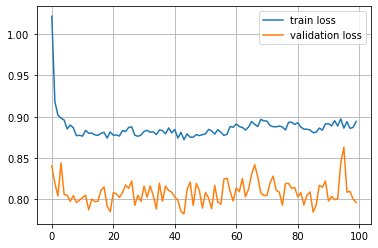

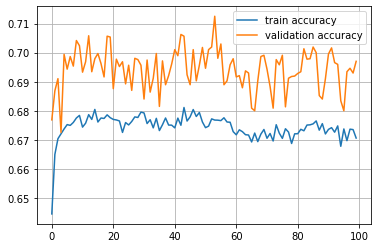

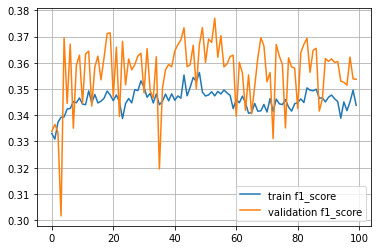

In [13]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### df1-8과 전체 데이터셋을 dense layer 64개, concat 후 32개 노드를 통해 학습

In [40]:
#df1-8에 대한 모델 생성

df1_input = Input(shape=(df1_x_train.shape[1],1))

df1_layer = Dense(128)(df1_input)
df1_layer = BatchNormalization()(df1_layer)
df1_layer = Activation('relu')(df1_layer)
df1_layer = Dropout(0.8)(df1_layer)
df1_layer = Flatten()(df1_layer)
df1_model = Model(inputs=df1_input, outputs=df1_layer)

df2_input = Input(shape=(df2_x_train.shape[1],1))

df2_layer = Dense(128)(df2_input)
df2_layer = BatchNormalization()(df2_layer)
df2_layer = Activation('relu')(df2_layer)
df2_layer = Dropout(0.8)(df2_layer)
df2_layer = Flatten()(df2_layer)
df2_model = Model(inputs=df2_input, outputs=df2_layer)

df3_input = Input(shape=(df3_x_train.shape[1],1))

df3_layer = Dense(128)(df3_input)
df3_layer = BatchNormalization()(df3_layer)
df3_layer = Activation('relu')(df3_layer)
df3_layer = Dropout(0.8)(df3_layer)
df3_layer = Flatten()(df3_layer)
df3_model = Model(inputs=df3_input, outputs=df3_layer)

df4_input = Input(shape=(df4_x_train.shape[1],1))

df4_layer = Dense(128)(df4_input)
df4_layer = BatchNormalization()(df4_layer)
df4_layer = Activation('relu')(df4_layer)
df4_layer = Dropout(0.8)(df4_layer)
df4_layer = Flatten()(df4_layer)
df4_model = Model(inputs=df4_input, outputs=df4_layer)

df5_input = Input(shape=(df5_x_train.shape[1],1))

df5_layer = Dense(128)(df5_input)
df5_layer = BatchNormalization()(df5_layer)
df5_layer = Activation('relu')(df5_layer)
df5_layer = Dropout(0.8)(df5_layer)
df5_layer = Flatten()(df5_layer)
df5_model = Model(inputs=df5_input, outputs=df5_layer)

df6_input = Input(shape=(df6_x_train.shape[1],1))

df6_layer = Dense(128)(df6_input)
df6_layer = BatchNormalization()(df6_layer)
df6_layer = Activation('relu')(df6_layer)
df6_layer = Dropout(0.8)(df6_layer)
df6_layer = Flatten()(df6_layer)
df6_model = Model(inputs=df6_input, outputs=df6_layer)

df7_input = Input(shape=(df7_x_train.shape[1],1))

df7_layer = Dense(128)(df7_input)
df7_layer = BatchNormalization()(df7_layer)
df7_layer = Activation('relu')(df7_layer)
df7_layer = Dropout(0.8)(df7_layer)
df7_layer = Flatten()(df7_layer)
df7_model = Model(inputs=df7_input, outputs=df7_layer)

df8_input = Input(shape=(df8_x_train.shape[1],1))

df8_layer = Dense(128)(df8_input)
df8_layer = BatchNormalization()(df8_layer)
df8_layer = Activation('relu')(df8_layer)
df8_layer = Dropout(0.8)(df8_layer)
df8_layer = Flatten()(df8_layer)
df8_model = Model(inputs=df8_input, outputs=df8_layer)

entire_input = Input(shape=(entire_x_train.shape[1],1))

entire_layer = Dense(128)(entire_input)
entire_layer = BatchNormalization()(entire_layer)
entire_layer = Activation('relu')(entire_layer)
entire_layer = Dropout(0.5)(entire_layer)
entire_layer = Flatten()(entire_layer)
entire_model = Model(inputs=entire_input, outputs=entire_layer)

In [22]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output, 
                      df6_model.output, df7_model.output, df8_model.output, entire_model.output])

#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(32)(result)
z = BatchNormalization()(z)
z = Activation('relu')(z)
z = Dropout(0.5)(z)
z = Dense(5, activation='softmax')(z)

#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input, df6_input,
                     df7_input, df8_input, entire_input], outputs=z)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [23]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train, entire_x_train], y_train,
                 epochs=100, batch_size=16, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, 
                                                                df5_x_valid, df6_x_valid, df7_x_valid, df8_x_valid, 
                                                               entire_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/100
1680/1680 [==============================] - 23s 13ms/step - loss: 0.9078 - accuracy: 0.6733 - f1_score: 0.3723 - val_loss: 0.7344 - val_accuracy: 0.7150 - val_f1_score: 0.3725
Epoch 2/100
1680/1680 [==============================] - 22s 13ms/step - loss: 0.7971 - accuracy: 0.7092 - f1_score: 0.3959 - val_loss: 0.7170 - val_accuracy: 0.7161 - val_f1_score: 0.3944
Epoch 3/100
1680/1680 [==============================] - 22s 13ms/step - loss: 0.7600 - accuracy: 0.7206 - f1_score: 0.4146 - val_loss: 0.7338 - val_accuracy: 0.7109 - val_f1_score: 0.3874
Epoch 4/100
1680/1680 [==============================] - 22s 13ms/step - loss: 0.7344 - accuracy: 0.7297 - f1_score: 0.4266 - val_loss: 0.6793 - val_accuracy: 0.7390 - val_f1_score: 0.4444
Epoch 5/100
1680/1680 [==============================] - 22s 13ms/step - loss: 0.7240 - accuracy: 0.7320 - f1_score: 0.4374 - val_loss: 0.6615 - val_accuracy: 0.7443 - val_f1_score: 0.4293
Epoch 6/100
1680/1680 [==============================] 

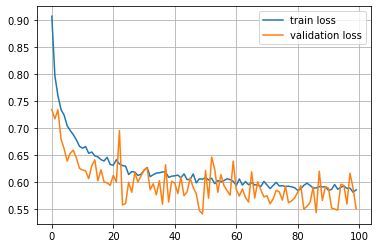

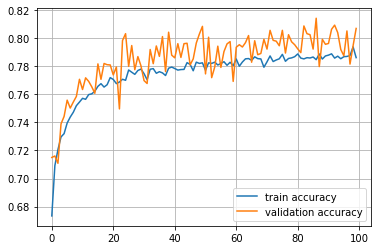

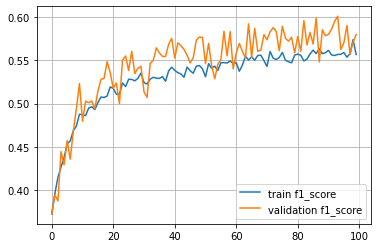

In [24]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### dense layer 64개, concat 후 64개 노드를 통해 학습

In [29]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output, 
                      df6_model.output, df7_model.output, df8_model.output, entire_model.output])

#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(64)(result)
z = BatchNormalization()(z)
z = Activation('relu')(z)
z = Dropout(0.5)(z)
z = Dense(5, activation='softmax')(z)

#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input, df6_input,
                     df7_input, df8_input, entire_input], outputs=z)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [30]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train, entire_x_train], y_train,
                 epochs=100, batch_size=16, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, 
                                                                df5_x_valid, df6_x_valid, df7_x_valid, df8_x_valid, 
                                                               entire_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/100
1680/1680 [==============================] - 23s 12ms/step - loss: 0.9879 - accuracy: 0.6588 - f1_score: 0.4022 - val_loss: 0.7397 - val_accuracy: 0.7226 - val_f1_score: 0.4483
Epoch 2/100
1680/1680 [==============================] - 21s 12ms/step - loss: 0.8175 - accuracy: 0.7021 - f1_score: 0.4347 - val_loss: 0.7013 - val_accuracy: 0.7391 - val_f1_score: 0.4707
Epoch 3/100
1680/1680 [==============================] - 21s 12ms/step - loss: 0.7750 - accuracy: 0.7204 - f1_score: 0.4569 - val_loss: 0.6769 - val_accuracy: 0.7479 - val_f1_score: 0.4651
Epoch 4/100
1680/1680 [==============================] - 21s 12ms/step - loss: 0.7427 - accuracy: 0.7299 - f1_score: 0.4673 - val_loss: 0.6543 - val_accuracy: 0.7555 - val_f1_score: 0.4879
Epoch 5/100
1680/1680 [==============================] - 21s 12ms/step - loss: 0.7249 - accuracy: 0.7352 - f1_score: 0.4722 - val_loss: 0.6407 - val_accuracy: 0.7619 - val_f1_score: 0.5151
Epoch 6/100
1680/1680 [==============================] 

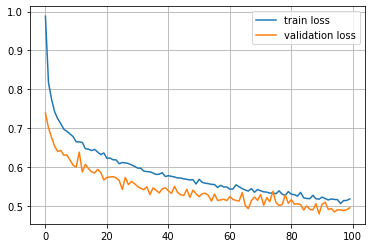

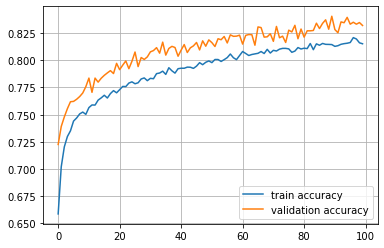

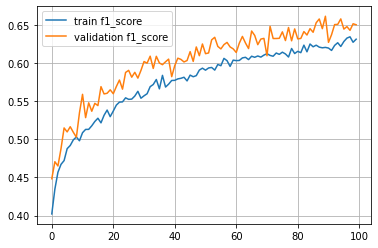

In [31]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()

### dense layer 64개, concat 후 128개 노드를 통해 학습

In [47]:
#생성한 모델 concat

result = concatenate([df1_model.output, df2_model.output, df3_model.output, df4_model.output, df5_model.output, 
                      df6_model.output, df7_model.output, df8_model.output, entire_model.output])

#연결된 값을 입력으로 받는 밀집층을 추가

z = Dense(128)(result)
z = BatchNormalization()(z)
z = Activation('relu')(z)
z = Dropout(0.8)(z)
z = Dense(64)(result)
z = BatchNormalization()(z)
z = Activation('relu')(z)
z = Dropout(0.5)(z)
z = Dense(5, activation='softmax')(z)

#최종적인 모델

model = Model(inputs=[df1_input, df2_input, df3_input, df4_input, df5_input, df6_input,
                     df7_input, df8_input, entire_input], outputs=z)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002), 
              loss='categorical_crossentropy', metrics=['accuracy', tfa.metrics.F1Score(5, average='macro')])

In [36]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit([df1_x_train, df2_x_train, df3_x_train, df4_x_train, df5_x_train, df6_x_train,
                 df7_x_train, df8_x_train, entire_x_train], y_train,
                 epochs=100, batch_size=16, validation_data = ([df1_x_valid, df2_x_valid, df3_x_valid, df4_x_valid, 
                                                                df5_x_valid, df6_x_valid, df7_x_valid, df8_x_valid, 
                                                               entire_x_valid], y_valid))

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/100
1680/1680 [==============================] - 22s 12ms/step - loss: 0.9455 - accuracy: 0.6672 - f1_score: 0.4059 - val_loss: 0.7440 - val_accuracy: 0.7183 - val_f1_score: 0.4480
Epoch 2/100
1680/1680 [==============================] - 20s 12ms/step - loss: 0.8069 - accuracy: 0.7097 - f1_score: 0.4399 - val_loss: 0.7135 - val_accuracy: 0.7286 - val_f1_score: 0.4301
Epoch 3/100
1680/1680 [==============================] - 20s 12ms/step - loss: 0.7604 - accuracy: 0.7239 - f1_score: 0.4486 - val_loss: 0.6898 - val_accuracy: 0.7449 - val_f1_score: 0.4553
Epoch 4/100
1680/1680 [==============================] - 20s 12ms/step - loss: 0.7403 - accuracy: 0.7342 - f1_score: 0.4661 - val_loss: 0.6777 - val_accuracy: 0.7470 - val_f1_score: 0.4625
Epoch 5/100
1680/1680 [==============================] - 20s 12ms/step - loss: 0.7243 - accuracy: 0.7394 - f1_score: 0.4757 - val_loss: 0.6892 - val_accuracy: 0.7519 - val_f1_score: 0.4969
Epoch 6/100
1680/1680 [==============================] 

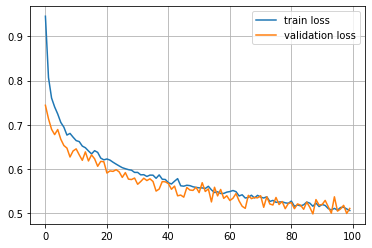

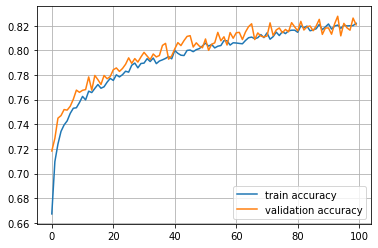

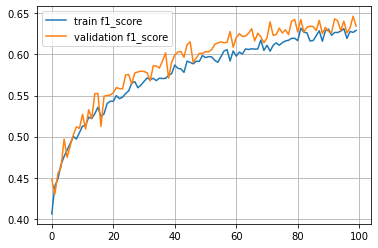

In [37]:
import matplotlib.pyplot as plt

plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')

plt.show()

plt.grid()

plt.plot(hist.history['f1_score'], label='train f1_score')
plt.plot(hist.history['val_f1_score'], label='validation f1_score')
plt.legend(loc='best')

plt.show()